![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)


**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 2: Filtros media movil / filtro gaussiano
```

###**2.1. Importación de Librerías y creación de la señal de prueba**

* **Librerias a utilizar:**



In [94]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')



* **Creacion de una señal con ruido**

In [112]:
fm = 1000 # frecuencia de mustreo
t = np.arange(0, 3, 1/fm)  #variable independiente discreta
n = len(t)  #longitud de la señal
p = 15
amplitud_ruido =

ampl = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30) #señal pura
ruido = amplitud_ruido*np.random.rand(n)   #ruido generado

senial_ruidosa = ampl + ruido #señal con ruido



* **Mostrando señales generadas:**

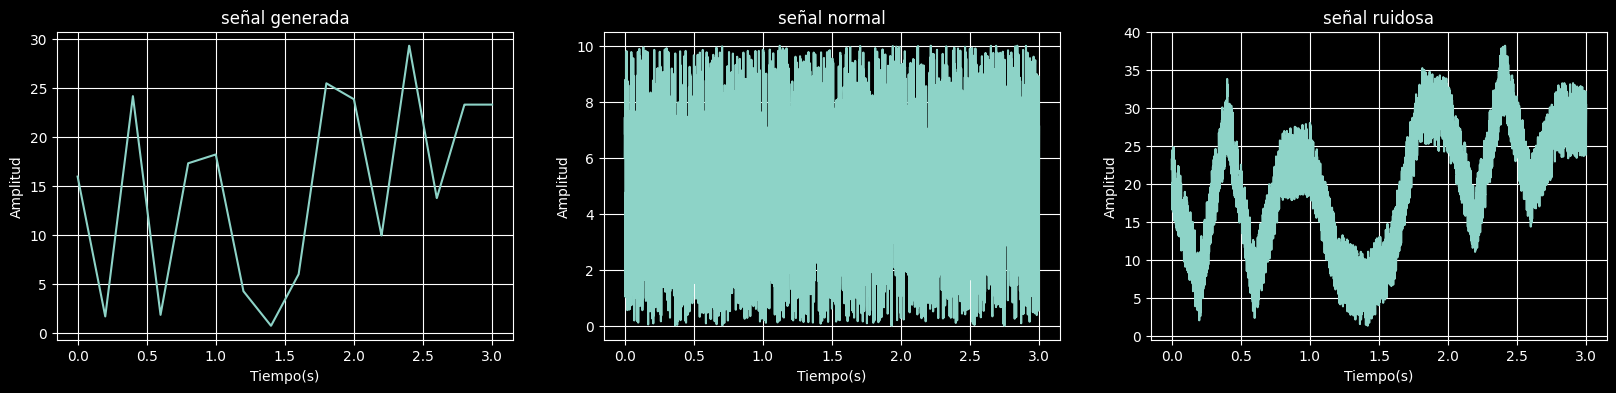

In [113]:
plt.subplots(1, 3, figsize = (20,4))  #subplot con 1 fila y 3 columnas


plt.subplot(131)
plt.plot(t, ampl)
plt.grid(True)
plt.title('señal generada')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(132)
plt.plot(t, ruido)
plt.grid(True)
plt.title('señal normal')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(133)
plt.plot(t, senial_ruidosa)
plt.grid(True)
plt.title('señal ruidosa')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.show()



### **2.2. Filtro media movil**

* **Estructura del filtro:**

![promedio movil.png](https://i.ibb.co/qgv7gP5/promedio-movil.png=100x20)

* **Mas referencias teóricas: **
1. [Media Movil](https://es.wikipedia.org/wiki/Media_m%C3%B3vil)
2. Consultar el libro [2] de la bibliografia del curso en la pagina 38.



* **Aplicación del filtro media movil:**

41.0


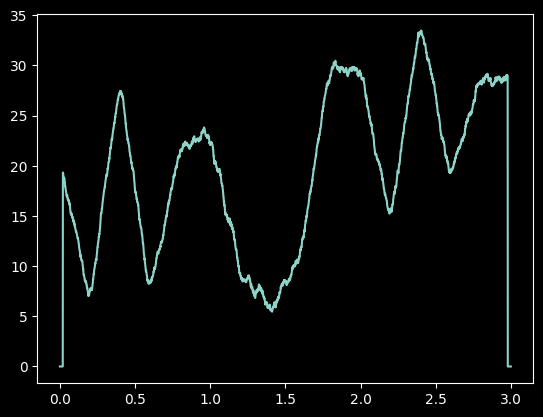

In [114]:
senial_filtrada = np.zeros_like(senial_ruidosa) #iniciamos el vector de salida

k = 20

for i in range(k,n-k-1):
  senial_filtrada[i] = np.mean(senial_ruidosa[i-k:i+k])

tamanio_ventana = 1000*((2*k+1)/fm)  #tamaño del filtro en milisegundos

print(tamanio_ventana)
plt.plot(t,senial_filtrada)


* **Gráficas de los resutados:**

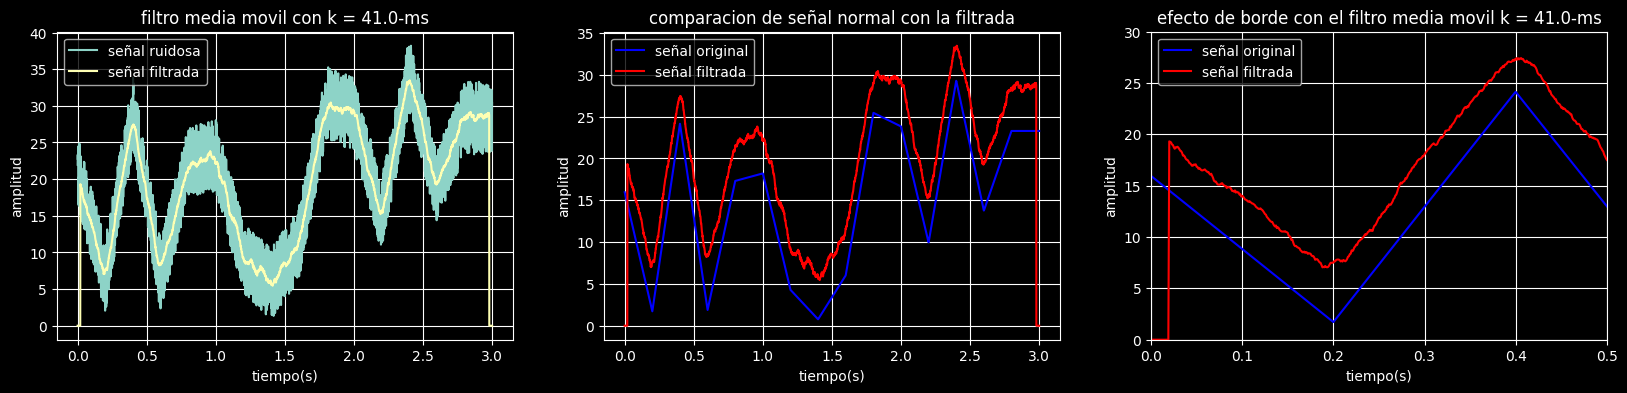

In [115]:
plt.subplots(1,3,figsize = (20,4))

plt.subplot(131)
plt.plot(t,senial_ruidosa,label = "señal ruidosa")
plt.plot(t,senial_filtrada,label = 'señal filtrada')
plt.title(f'filtro media movil con k = {tamanio_ventana}-ms')
plt.xlabel('tiempo(s)')
plt.ylabel('amplitud')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t,ampl,'b',label='señal original')
plt.plot(t,senial_filtrada,'r',label='señal filtrada')
plt.title('comparacion de señal normal con la filtrada')
plt.xlabel('tiempo(s)')
plt.ylabel('amplitud')
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t,ampl,'b',label='señal original')
plt.plot(t,senial_filtrada,'r',label='señal filtrada')
plt.title(f'efecto de borde con el filtro media movil k = {tamanio_ventana}-ms')
plt.xlabel('tiempo(s)')
plt.ylabel('amplitud')
plt.axis([0, 0.5, 0, 30])
plt.grid()
plt.legend()

plt.show()

### **2.3. Filtro Gaussiano**

* **Ecuacion para creacion del filtro:**

![Ecuacion Gaussiana](https://i.ibb.co/QCJZ27n/gauss-filter.png)


* **Referencias teoricas:**
1. [Filtro Gaussiano](https://en.wikipedia.org/wiki/Gaussian_filter)

2. [FWHM](https://https://en.wikipedia.org/wiki/Full_width_at_half_maximum#:~:text=In%20a%20distribution%2C%20full%20width,half%20of%20its%20maximum%20value.&text=If%20the%20FWHM%20of%20a,be%20integrated%20by%20simple%20multiplication.)

* **Creación del filtro gaussiano:**

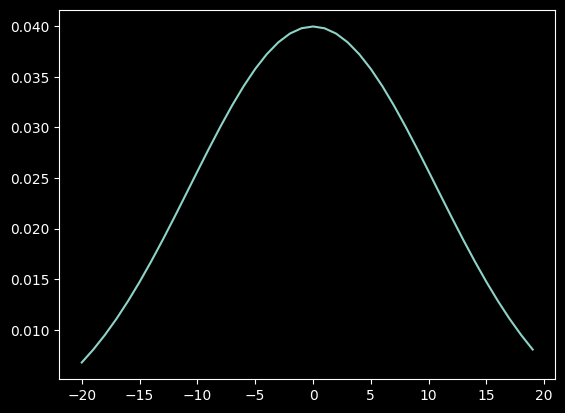

In [116]:
FWHM = 25
K = 100
gauss_t = 1000*np.arange(-k,k)/fm

filtro_gaussiano = np.exp(-4*(np.log(2)*gauss_t**2)/FWHM**2) #creacion de filtro gaussiano
filtro_gaussiano_normalizado = filtro_gaussiano/np.sum(filtro_gaussiano)
plt.plot(gauss_t,filtro_gaussiano_normalizado)
#calculo empírico del tanaño del FWHM en ms

ind_flanco_bajada = k + np.argmin((filtro_gaussiano[k:]-.5)**2)
ind_flanco_subida =  np.argmin((filtro_gaussiano-.5)**2)
FWHM_calculado = gauss_t[ind_flanco_subida]-gauss_t[ind_flanco_bajada]  #lapso de duracion FWHM en ms


* **Mostrando el filtro gaussiano construido:**

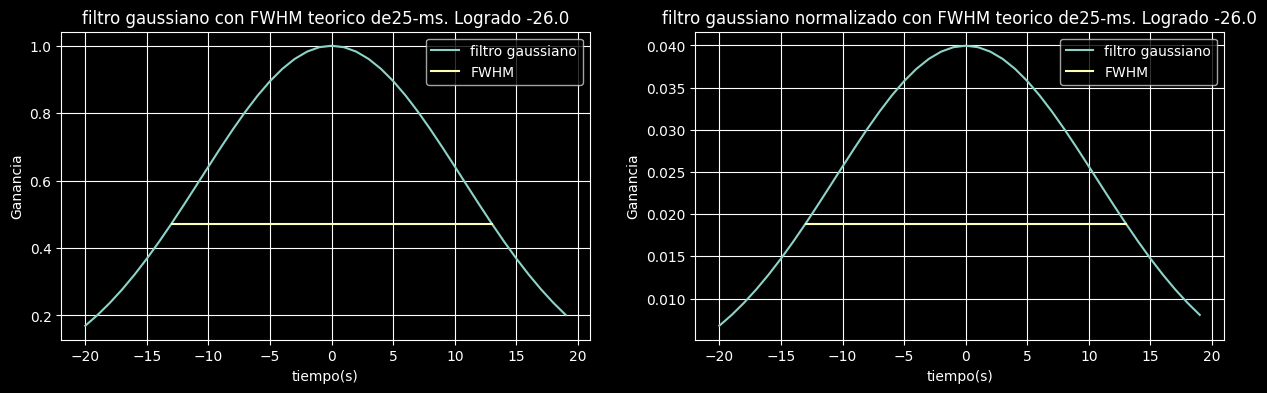

In [117]:
plt.subplots(1,2,figsize = (15,4))

plt.subplot(121)
plt.plot(gauss_t,filtro_gaussiano,label = "filtro gaussiano")
plt.plot([gauss_t[ind_flanco_subida],gauss_t[ind_flanco_bajada]],[filtro_gaussiano[ind_flanco_subida],
         filtro_gaussiano[ind_flanco_bajada]],label = "FWHM")
plt.title(f'filtro gaussiano con FWHM teorico de{FWHM}-ms. Logrado {FWHM_calculado}')
plt.xlabel('tiempo(s)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(gauss_t,filtro_gaussiano_normalizado,label = "filtro gaussiano")
plt.plot([gauss_t[ind_flanco_subida],gauss_t[ind_flanco_bajada]],[filtro_gaussiano_normalizado[ind_flanco_subida],
         filtro_gaussiano_normalizado[ind_flanco_bajada]],label = "FWHM")
plt.title(f'filtro gaussiano normalizado con FWHM teorico de{FWHM}-ms. Logrado {FWHM_calculado}')
plt.xlabel('tiempo(s)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()

plt.show()

* **Aplicación del filtro Gaussiano:**

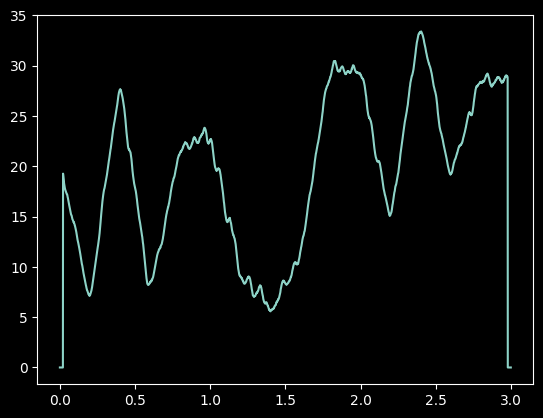

In [119]:
senial_filtrada_gauss = np.zeros_like(senial_ruidosa)


for i in range(k+1,n-k-1):
  senial_filtrada_gauss[i] = np.sum(senial_ruidosa[i-k:i+k]*filtro_gaussiano_normalizado)


#tamanio_ventana = 1000*((2*k+1)/fm)  #tamaño del filtro en milisegundos
#print(tamanio_ventana)
plt.plot(t,senial_filtrada_gauss)


* **Mostrando los resultados:**

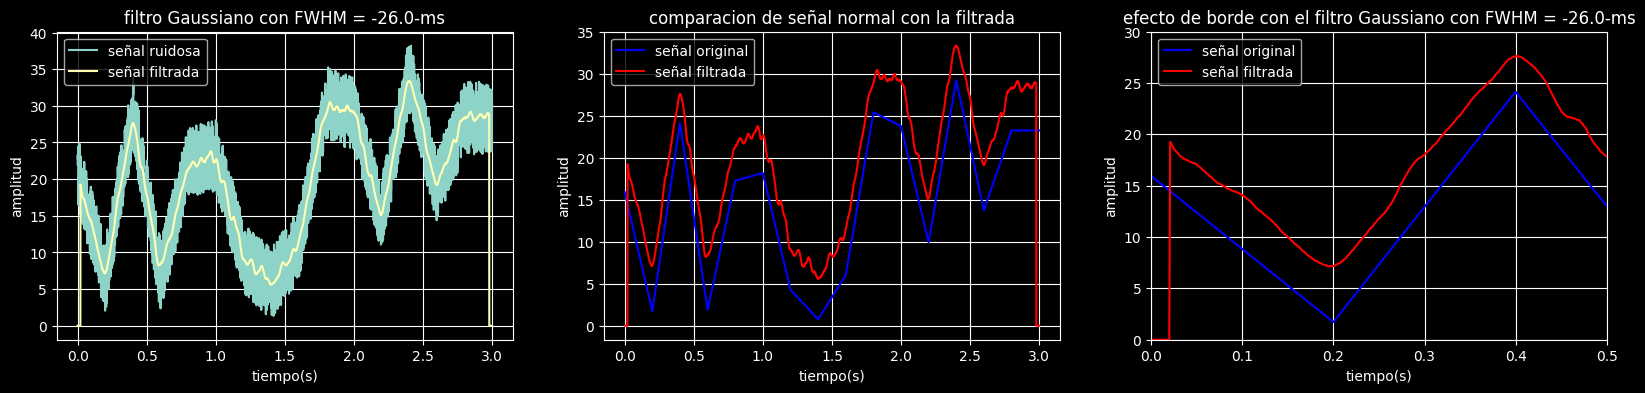

In [120]:
plt.subplots(1,3,figsize = (20,4))

plt.subplot(131)
plt.plot(t,senial_ruidosa,label = "señal ruidosa")
plt.plot(t,senial_filtrada_gauss,label = 'señal filtrada')
plt.title(f'filtro Gaussiano con FWHM = {FWHM_calculado}-ms')
plt.xlabel('tiempo(s)')
plt.ylabel('amplitud')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t,ampl,'b',label='señal original')
plt.plot(t,senial_filtrada_gauss,'r',label='señal filtrada')
plt.title('comparacion de señal normal con la filtrada')
plt.xlabel('tiempo(s)')
plt.ylabel('amplitud')
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t,ampl,'b',label='señal original')
plt.plot(t,senial_filtrada_gauss,'r',label='señal filtrada')
plt.title(f'efecto de borde con el filtro Gaussiano con FWHM = {FWHM_calculado}-ms')
plt.xlabel('tiempo(s)')
plt.ylabel('amplitud')
plt.axis([0, 0.5, 0, 30])
plt.grid()
plt.legend()

plt.show()


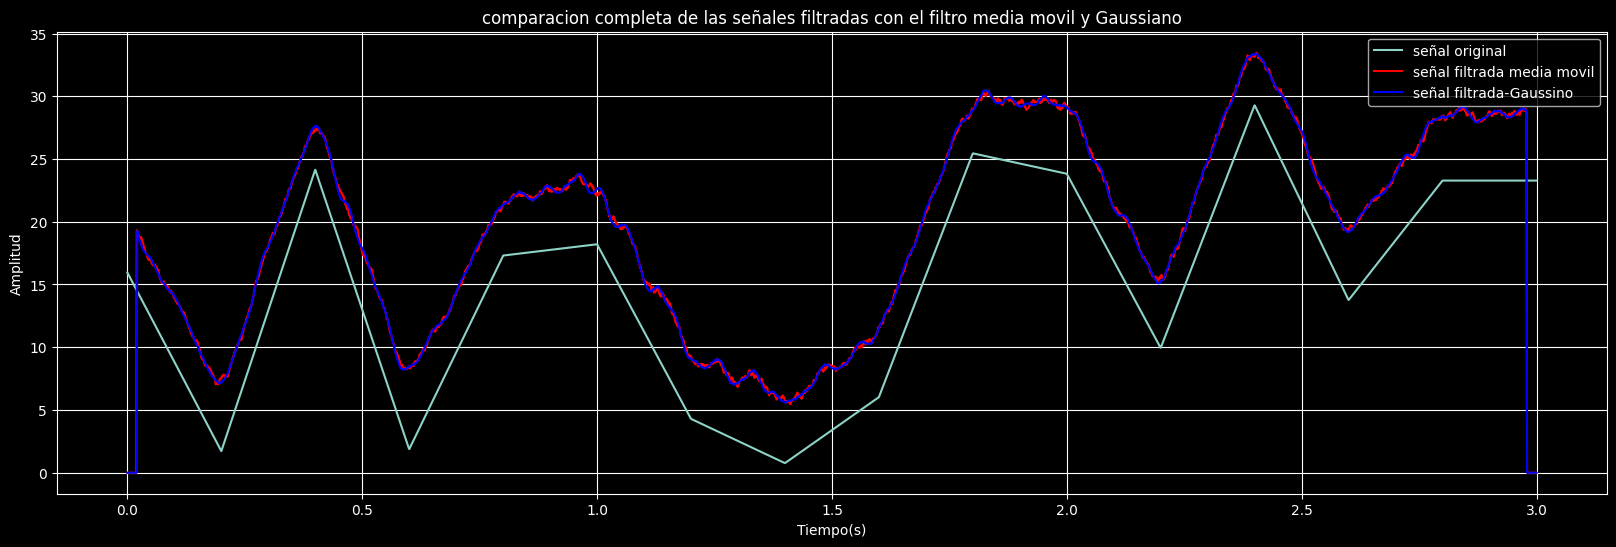

In [121]:
plt.subplots(figsize = (20,6))

plt.plot(t,ampl,label='señal original')
plt.plot(t,senial_filtrada,'r',label='señal filtrada media movil')
plt.plot(t,senial_filtrada_gauss,'b',label='señal filtrada-Gaussino')
plt.title(f'comparacion completa de las señales filtradas con el filtro media movil y Gaussiano')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.show()

#TEST DE COMPROBACIÓN

---

#a)	¿Cuál es la diferencia entre una señal estocástica de una señal determinística?
Las señales estocásticas y las señales determinísticas se distinguen principalmente por la naturaleza de su comportamiento.
Una señal determinística es aquella en la que su comportamiento o evolución en el tiempo se puede prever y calcular con precisión utilizando una ecuación matemática o una fórmula específica. En otras palabras, su patrón o forma es conocido y predecible de antemano. Un ejemplo común de señal determinística es una señal sinusoidal, como una onda senoidal, donde su amplitud, frecuencia y fase son constantes y pueden describirse matemáticamente.
En contraste, una señal estocástica es aquella cuyo comportamiento no puede preverse con certeza y varía de manera aleatoria o probabilística en el tiempo. No se puede describir completamente mediante una fórmula matemática única. Las señales estocásticas suelen tener componentes de ruido o variabilidad inherente, lo que significa que pueden mostrar fluctuaciones impredecibles. Por ejemplo, el ruido eléctrico en una señal de audio es un ejemplo de una señal estocástica, ya que su comportamiento varía de manera aleatoria debido a múltiples factores.
#b)	¿Qué es la tasa de muestreo de la señal?
La tasa de muestreo de una señal, también conocida como frecuencia de muestreo o frecuencia de muestreo Nyquist, es el número de muestras o mediciones tomadas por unidad de tiempo de una señal continua para convertirla en una señal discreta o digital. En otras palabras, es la cantidad de veces que se toma una "instantánea" de la señal analógica en un período determinado para representarla de manera digital.
La tasa de muestreo es una consideración fundamental en el proceso de digitalización de señales analógicas y es esencial para garantizar la precisión y la calidad de la señal digital resultante. La teoría de Nyquist-Shannon establece que para reconstruir con precisión una señal continua a partir de su versión discreta, la tasa de muestreo debe ser al menos el doble de la frecuencia máxima presente en la señal continua. Esto se conoce como el teorema del muestreo de Nyquist.
#c)	¿El filtro media móvil implementado es causal?
Para que un filtro sea causal deben estar en tiempo real por lo que, en nuestro caso es no causal e irrealizables en la práctica. Para que se pueda se trabajar este tipo de señal no causales se hace uso de una computadora como se hizo en la clase donde la señal de entrada y de salida del filtro son secuencias de números almacenadas en memoria. En nuestro caso implementado una señal aleatoria generada es decir la salida puede depender de cualquier muestra de la entrada.
